In [9]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [10]:
def getQuartiles(df, col):
    df["quartile"] = pd.qcut(df[col], 4, labels=False)

    quartile_1 = df[df['quartile'] == 0]
    quartile_2 = df[df['quartile'] == 1]
    quartile_3 = df[df['quartile'] == 2]
    quartile_4 = df[df['quartile'] == 3]
    return [quartile_1, quartile_2, quartile_3, quartile_4]

## Analise dos dados

In [11]:
DATA_PATH = "./data"
FILE_NAME = "stackoverflow.csv"

In [12]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(f"{DATA_PATH}/{FILE_NAME}")
df.sample(3)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
76215,76216,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Udemy,8,4,DevOps specialist,20 to 99 employees,I have some influence,Investigate,Ask developers I know/work with;Visit develope...,South Korea,KRW\tSouth Korean won,55000000.0,Go;Python,Go;Python,NaN,NaN,Amazon Web Services (AWS);Google Cloud,Amazon Web Services (AWS);Google Cloud,NaN,NaN,NaN,NaN,Docker;Kubernetes;Terraform,Ansible;Kubernetes;Terraform,IntelliJ IDEA;PyCharm;Vim;Visual Studio Code,IntelliJ IDEA;PyCharm;Visual Studio Code,Windows;Windows Subsystem for Linux (WSL),MacOS;Ubuntu,Confluence;Jira;Markdown File;Notion,Jira;Markdown File,Google Meet;Microsoft Teams;Slack;Telegram;Zoom,Google Meet;Slack,Bing AI;ChatGPT,Bing AI;ChatGPT,NaN,NaN,Stack Overflow;Stack Exchange;Collectives on S...,A few times per week,Yes,A few times per month or weekly,"Yes, somewhat",NaN,Yes,Favorable,Increase productivity;Greater efficiency;Impro...,Somewhat distrust,Learning about a codebase;Project planning;Doc...,Documenting code;Collaborating with teammates,Writing code;Debugging and getting help;Testin...,Documenting code,NaN,NaN,NaN,Collaborating with teammates,Yes,Individual contributor,4.0,Neither agree nor disagree,Disagree,Agree,Neither agree nor disagree,Strongly agree,Disagree,Neither agree nor disagree,Agree,1-2 times a week,3-5 times a week,1-2 times a week,60-120 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Neither easy nor difficult,42323.0
36704,36705,I agree,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",In-person,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Formal documentation provided by the owner of ...,NaN,21,16,"Developer, full-stack",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Visit developer communities...,Russian Federation,RUB\tRussian ruble,NaN,C#;HTML/CSS;JavaScript;SQL,C#;HTML/CSS;JavaScript;SQL,Microsoft SQL Server;MongoDB,Microsoft SQL Server;MongoDB,NaN,NaN,ASP.NET;jQuery;Vue.js,ASP.NET;jQuery;Vue.js,.NET Framework (1.0 - 4.8),.NET Framework (1.0 - 4.8),MSBuild;NuGet;Visual Studio Solution,MSBuild;NuGet;Visual Studio Solution,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual St

Vamos conveter os dados de anos de programação para valores unica e exclusivamente numéricos. Vamos também remover os outliers que desviem 3 desvios padrões da coluna de salario convertido em dolares.

In [13]:
def converte_yearsCode(row, col):
    years = row[col]
    if years == 'Less than 1 year':
        years = '1'
    elif years == 'More than 50 years':
        years = '50'
    return int(years)

filtered_df = df.dropna(subset=["ConvertedCompYearly", "DevType", "YearsCode", "YearsCodePro"])
no_out_df = filtered_df[np.abs(stats.zscore(filtered_df['ConvertedCompYearly'])) < 3]
no_out_df["YearsCodePro"] = no_out_df.apply(lambda row: converte_yearsCode(row, "YearsCodePro"), axis=1)
no_out_df["YearsCode"] = no_out_df.apply(lambda row: converte_yearsCode(row, "YearsCode"), axis=1)

filtered_df.shape, no_out_df.shape

/tmp/ipykernel_1198/3579111378.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_out_df["YearsCodePro"] = no_out_df.apply(lambda row: converte_yearsCode(row, "YearsCodePro"), axis=1)
/tmp/ipykernel_1198/3579111378.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_out_df["YearsCode"] = no_out_df.apply(lambda row: converte_yearsCode(row, "YearsCode"), axis=1)


((47698, 84), (47666, 84))

### Converter salarios

Vamos ver como os dados de salário se comportam sem e com a conversão em poder de compra equivalentes usando PPP

(array([1.200e+02, 3.720e+02, 1.282e+03, 2.128e+03, 2.385e+03, 1.909e+03,
        1.334e+03, 6.620e+02, 5.340e+02, 3.490e+02, 1.370e+02, 1.370e+02,
        5.000e+01, 1.180e+02, 7.100e+01, 1.600e+01, 6.800e+01, 1.400e+01,
        1.700e+01, 2.600e+01, 3.000e+00, 5.000e+00, 4.000e+00, 9.000e+00,
        6.000e+00, 0.000e+00, 1.200e+01, 1.000e+00, 5.000e+00, 5.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 9.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 3.00009800e+04, 6.00009600e+04, 9.00009400e+04,
        1.20000920e+05, 1.50000900e+05, 1.80000880e+05, 2.10000860e+05,
        2.40000840e+05, 2.70000820e+05, 3.00000800e+05, 3.30000780e+05,
        3.60000760e+05, 3.90000740e+05, 4.20000720e+05, 4.50000700e+05,
        4.80000680e+05, 5.10000660e+05, 5.40000640e+05, 5.70000620e+05,
        6.000006

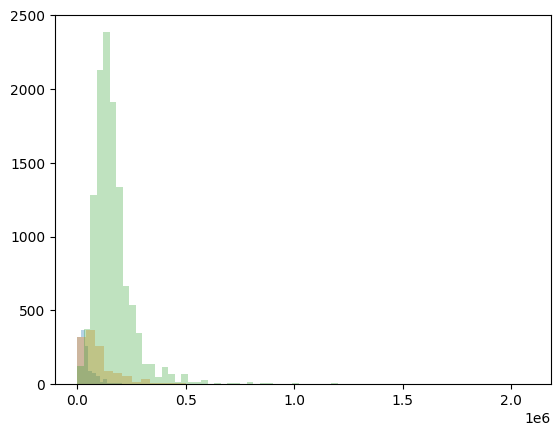

In [14]:
br_df = no_out_df[no_out_df["Country"] == "Brazil"]
br_ppp_df = no_out_df[no_out_df["Country"] == "Brazil"]
eua_df = no_out_df[no_out_df["Country"] == "United States of America"]

plt.hist(br_df["ConvertedCompYearly"], bins=50, alpha=0.33, label="Brazil")
plt.hist(br_df["ConvertedCompYearly"] * 2.44, bins=50, alpha=0.33, label="Brazil_PPP")
plt.hist(eua_df["ConvertedCompYearly"], bins=50, alpha=0.3, label="EUA")

Lista com os 30 países mais populosos na nossa base de dados e um mapa com o valor do PPP (Purchasing Power Parities).

Para converter salários em países de forma que possamos fazer uma análise justa temos que usar o fator de paridade de poder de compra (PPP). A formula para conversão de salários é:

$$ Salário_{pareado} = PPP * Salário_{convertido em dolar} $$

O PPP, neste caso, é o poder de compra relativo aos EUA. Assim, o PPP dos EUA é 1.

In [15]:
TOP10_COUNTRIES = ["United States of America", "Germany", "India", "United Kingdom of Great Britain and Northern Ireland", "Canada", "France", "Poland", "Netherlands", "Australia", "Brazil", "Italy", "Spain", "Sweden", "Switzerland", "Russian Federation", "Austria", "Israel", "Belgium", "Turkey", "Ukraine", "Denmark", "Romania", "Portugal", "Norway", "Finland", "New Zealand", "China", "Greece"]
PODER_DE_COMPRA_CONVERSAO = {
    "United States of America": (1, 139.7),
    "Germany": (0.7, 131.9),
    "India": (20.22, 216.9),
    "United Kingdom of Great Britain and Northern Ireland": (0.67, 142.7),
    "Canada": (1.17, 134.9),
    "France": (0.67, 124),
    "Poland": (1.88, 158.2),
    "Netherlands": (0.74, 137.7),
    "Australia": (1.39, 139.9),
    "Brazil": (2.44, 213.9),
    "Italy": (0.60, 128.6),
    "Spain": (0.57, 128.0),
    "Sweden": (8.51, 133.5),
    "Switzerland": (0.97, 104.4),
    "Russian Federation": (26.68, 199.4),
    "Austria": (0.71, 143.9),
    "Israel": (3.59, 118.8),
    "Belgium": (0.70, 137.8),
    "Turkey": (6.97, 834.6),
    "Ukraine": (10.52, 429.2),
    "Denmark": (6.11, 125.6),
    "Romania": (1.76, 167.7),
    "Portugal": (0.52, 126.0),
    "Norway": (8.89, 140.7),
    "Finland": (0.76, 131.0),
    "New Zealand": (1.46, 136.9),
    "China": (3.64, 132.2),
    "Greece": (0.52, 115.6)
}

/tmp/ipykernel_1198/4008719124.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top30_df["poder_de_compra"] = top30_df.apply(obtem_poder_de_compra,axis=1)


(39798, 85)

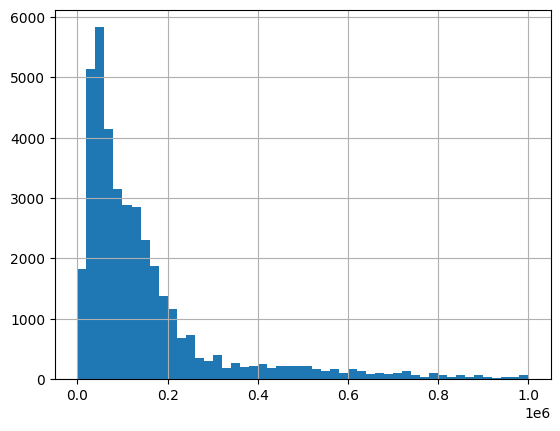

In [16]:
def obtem_poder_de_compra(row):
    vars = PODER_DE_COMPRA_CONVERSAO[row["Country"]]
    return row["ConvertedCompYearly"] * vars[0]

top30_df = no_out_df[no_out_df["Country"].isin(TOP10_COUNTRIES)]
top30_df["poder_de_compra"] = top30_df.apply(obtem_poder_de_compra,axis=1)

top30_df[top30_df["poder_de_compra"] < 1000000]["poder_de_compra"].hist(bins=50)
top30_df.shape

### Stacks

Vamos fazer o one hot encoding da lista de stacks que o indivíduo já usou no trabalho.

In [17]:
def concatena_stacks(row):
    lang = row["LanguageHaveWorkedWith"]
    # db = row["DatabaseHaveWorkedWith"]
    # platform = row["PlatformHaveWorkedWith"]
    # misc = row["MiscTechHaveWorkedWith"]
    
    languages = np.char.split("" if pd.isnull(lang) else lang, sep=';').tolist()
    # dbs = np.char.split("" if pd.isnull(db) else db, sep=';').tolist()
    # platforms = np.char.split("" if pd.isnull(platform) else platform, sep=';').tolist()
    # miscs = np.char.split("" if pd.isnull(misc) else misc, sep=';').tolist()
    
    # concatenated = languages + dbs + platforms + miscs
    concatenated = languages
    filtered = filter(lambda item: item != "", concatenated)

    return list(filtered)

stacks_df = top30_df
stacks_df["stacks"] = stacks_df.apply(concatena_stacks, axis=1)

df_exploded = stacks_df.explode(column='stacks')
df_one_hot = pd.get_dummies(df_exploded, columns=['stacks'])
df_one_hot = df_one_hot.groupby(level=0).sum()
stacks_df = df_one_hot.join(stacks_df, how="left", lsuffix='_left', rsuffix='')
stacks_df = stacks_df.drop(columns=['poder_de_compra_left'])

stacks_df.sample(1)

/tmp/ipykernel_1198/232995975.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stacks_df["stacks"] = stacks_df.apply(concatena_stacks, axis=1)
/tmp/ipykernel_1198/232995975.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_one_hot = df_one_hot.groupby(level=0).sum()


,ResponseId_left,YearsCode_left,YearsCodePro_left,CompTotal_left,WorkExp_left,ConvertedCompYearly_left,stacks_APL,stacks_Ada,stacks_Apex,stacks_Assembly,stacks_Bash/Shell (all shells),stacks_C,stacks_C#,stacks_C++,stacks_Clojure,stacks_Cobol,stacks_Crystal,stacks_Dart,stacks_Delphi,stacks_Elixir,stacks_Erlang,stacks_F#,stacks_Flow,stacks_Fortran,stacks_GDScript,stacks_Go,stacks_Groovy,stacks_HTML/CSS,stacks_Haskell,stacks_Java,stacks_JavaScript,stacks_Julia,stacks_Kotlin,stacks_Lisp,stacks_Lua,stacks_MATLAB,stacks_Nim,stacks_OCaml,stacks_Objective-C,stacks_PHP,stacks_Perl,stacks_PowerShell,stacks_Prolog,stacks_Python,stacks_R,stacks_Raku,stacks_Ruby,stacks_Rust,stacks_SAS,stacks_SQL,stacks_Scala,stacks_Solidity,stacks_Swift,stacks_TypeScript,stacks_VBA,stacks_Visual Basic (.Net),stacks_Zig,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly,poder_de_compra,stacks
81932,737397,99,72,189000.0,0.0,234621.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,81933,I agree,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Freelance/contract work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Colleague;On the job training;Other online res...,Formal documentation provided by the owner of ...,NaN,11,8,Academic researcher,"5,000 to 9,999 employees",I have little or no influence,NaN,Start a free trial;Ask developers I know/work ...,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,21000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;MA...,HTML/CSS;JavaScript;Nim;Python;R;TypeScript,NaN,NaN,Netlify,Netlify,Node.js,Node.js,NumPy;Tidyverse,NumPy;Qt;Tidyverse,npm,npm,RStudio;Visual Studio Code,RStudio;Visual Studio Code;VSCodium,Android;Ubuntu;Windows,Windows,Markdown File,Markdown File,Microsoft Teams;Signal;Whatsapp;Zoom,Matrix;Signal,NaN,NaN,NaN,NaN,Stack Overflow;Stack Exchange,A few times per week,Yes,I have never participated in Q&A on Stack Over...,"No, not really",NaN,"No, but I plan to soon",Indifferent,NaN,Somewhat distrust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,0.0,Strongly agree,Agree,Disagree,Disagree,Disagree,Agree,Agree,Neither agree nor disagree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26069.0,17466.23,"[Bash/Shell (all shells), HTML/CSS, JavaScript..."


### DevType

In [18]:
dev_df = df[["DevType"]]
dev_df = dev_df.dropna()
dev_df.sample(3)

,DevType
38297,"Developer, front-end"
47070,"Developer, back-end"
6111,"Developer, full-stack"


Todos os tipos de desenvolvedores que temos na base:

In [19]:
def get_raw_dev_type(row):
    raw = row["DevType"]
    return raw.replace('Developer, ', '')

type_df = dev_df[dev_df["DevType"].str.startswith("Developer")]
type_df = type_df.apply(get_raw_dev_type, axis=1)
type_df.unique(), type_df.unique().__len__()

(array(['back-end', 'front-end', 'full-stack',
        'desktop or enterprise applications', 'QA or test', 'mobile',
        'embedded applications or devices', 'game or graphics',
        'Developer Experience', 'Developer Advocate'], dtype=object),
 10)

Normalizemos, então, os tipos de desenvolvidores através da base

In [20]:
DEV_TYPE_BLACK_LIST = ["Student", "Designer", 'Senior-Executive-(C-Suite-VP-etc.)']

def cast_dev_type(row):
    _type = row["DevType"]
    if _type.startswith("Developer"):
        return get_raw_dev_type(row)
    if  _type == "Engineer, data":
        return "data-engineer"
    _type = _type.replace(' ', '-')
    _type = _type.replace(',', '')
    return _type

dev_df = stacks_df
dev_df["FinalDevType"] = dev_df.apply(cast_dev_type, axis=1)
dev_df = dev_df[~dev_df["FinalDevType"].isin(DEV_TYPE_BLACK_LIST)]

dev_df["FinalDevType"].unique(), dev_df["FinalDevType"].shape

(array(['back-end', 'front-end', 'full-stack', 'System-administrator',
        'QA or test', 'Data-scientist-or-machine-learning-specialist',
        'Data-or-business-analyst', 'Security-professional',
        'Research-&-Development-role', 'Database-administrator',
        'desktop or enterprise applications', 'data-engineer',
        'Product-manager', 'Cloud-infrastructure-engineer',
        'embedded applications or devices', 'Developer Experience',
        'Engineering-manager', 'Other-(please-specify):', 'mobile',
        'DevOps-specialist', 'Engineer-site-reliability',
        'Project-manager', 'Academic-researcher', 'Blockchain',
        'game or graphics', 'Developer Advocate', 'Hardware-Engineer',
        'Educator', 'Scientist', 'Marketing-or-sales-professional'],
       dtype=object),
 (39054,))

## Analise de correlacao

In [21]:
corr_stacks_df = dev_df[["stacks_APL", "stacks_Ada", "stacks_Apex", "stacks_Assembly", "stacks_Bash/Shell (all shells)", "stacks_C", "stacks_C#", "stacks_C++",
        "stacks_Clojure", "stacks_Cobol", "stacks_Crystal", "stacks_Dart", "stacks_Delphi", "stacks_Elixir", "stacks_Erlang", "stacks_F#", "stacks_Flow",
        "stacks_Fortran", "stacks_GDScript", "stacks_Go", "stacks_Groovy", "stacks_HTML/CSS", "stacks_Haskell", "stacks_Java", "stacks_JavaScript", "stacks_Julia",
        "stacks_Kotlin", "stacks_Lisp", "stacks_Lua", "stacks_MATLAB", "stacks_Nim", "stacks_OCaml", "stacks_Objective-C", "stacks_PHP", "stacks_Perl",
        "stacks_PowerShell", "stacks_Prolog", "stacks_Python", "stacks_R", "stacks_Raku", "stacks_Ruby", "stacks_Rust", "stacks_SAS", "stacks_SQL",
        "stacks_Scala", "stacks_Solidity", "stacks_Swift", "stacks_TypeScript", "stacks_VBA", "stacks_Visual Basic (.Net)", "stacks_Zig"]]
correlation = corr_stacks_df.corr()

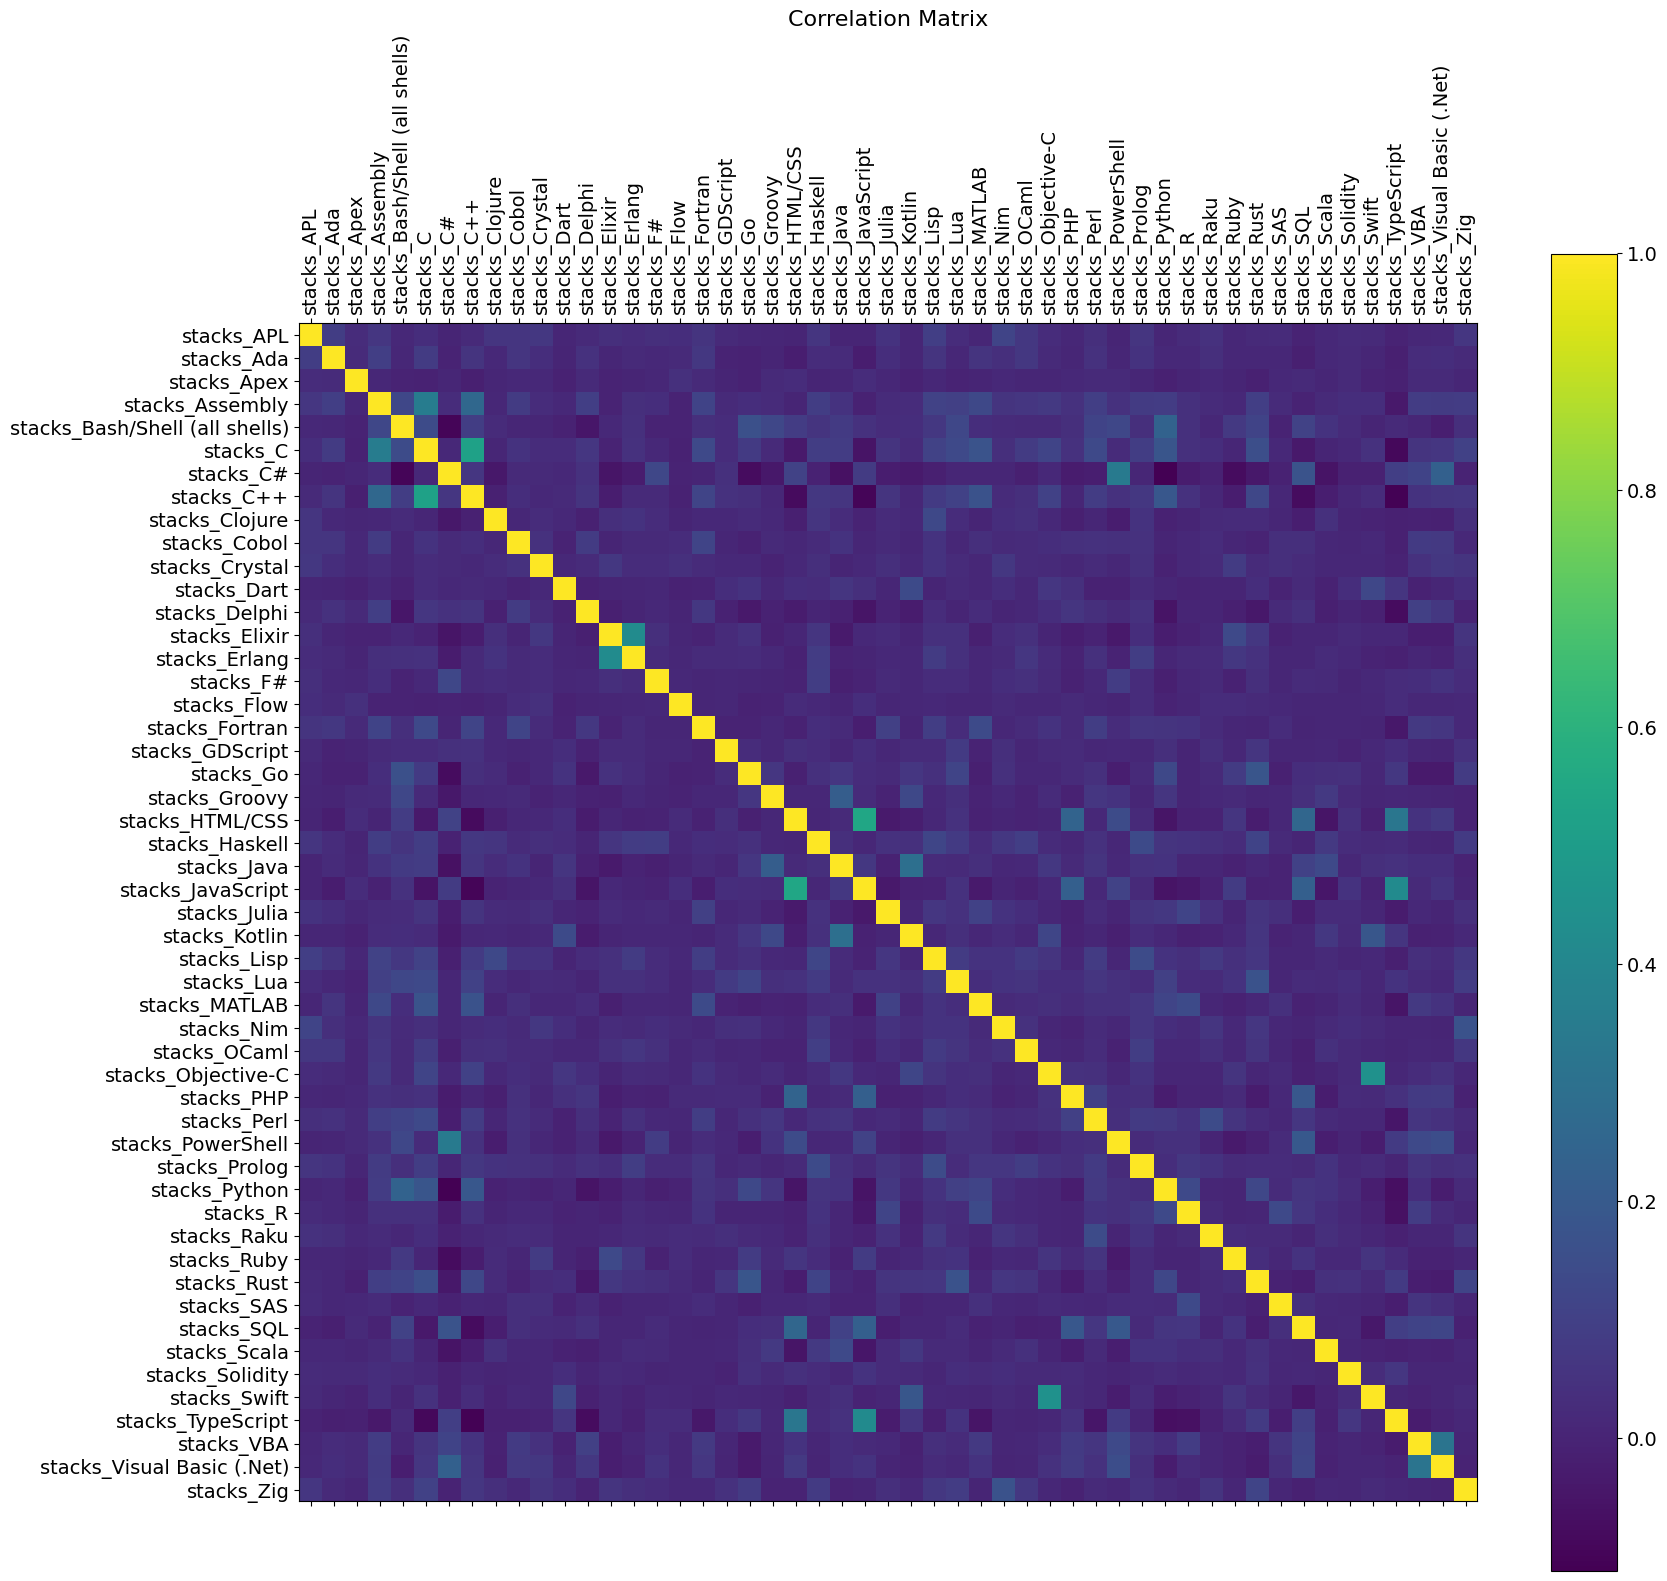

In [22]:
f = plt.figure(figsize=(19, 17))
plt.matshow(correlation, fignum=f.number)
plt.xticks(range(correlation.shape[1]), correlation.columns, fontsize=14, rotation=90)
plt.yticks(range(correlation.shape[1]), correlation.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [23]:
corr_stacks_salario_df = dev_df[["stacks_APL", "stacks_Ada", "stacks_Apex", "stacks_Assembly", "stacks_Bash/Shell (all shells)", "stacks_C", "stacks_C#", "stacks_C++",
        "stacks_Clojure", "stacks_Cobol", "stacks_Crystal", "stacks_Dart", "stacks_Delphi", "stacks_Elixir", "stacks_Erlang", "stacks_F#", "stacks_Flow",
        "stacks_Fortran", "stacks_GDScript", "stacks_Go", "stacks_Groovy", "stacks_HTML/CSS", "stacks_Haskell", "stacks_Java", "stacks_JavaScript", "stacks_Julia",
        "stacks_Kotlin", "stacks_Lisp", "stacks_Lua", "stacks_MATLAB", "stacks_Nim", "stacks_OCaml", "stacks_Objective-C", "stacks_PHP", "stacks_Perl",
        "stacks_PowerShell", "stacks_Prolog", "stacks_Python", "stacks_R", "stacks_Raku", "stacks_Ruby", "stacks_Rust", "stacks_SAS", "stacks_SQL",
        "stacks_Scala", "stacks_Solidity", "stacks_Swift", "stacks_TypeScript", "stacks_VBA", "stacks_Visual Basic (.Net)", "stacks_Zig", "poder_de_compra"]]
correlation = corr_stacks_salario_df.corr()["poder_de_compra"]

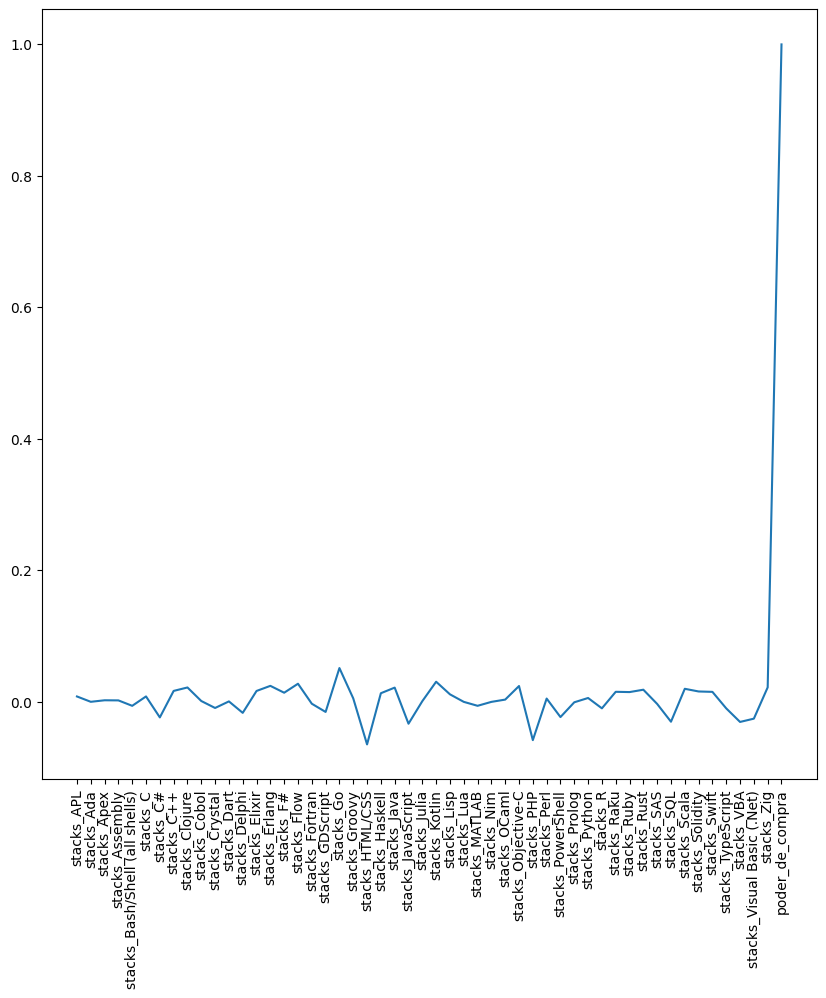

In [24]:
f = plt.figure(figsize=(10, 10))
plt.plot(correlation)
plt.xticks(rotation=90)
plt.show()

In [25]:
outros_salario_df = dev_df[["Age","Employment","RemoteWork","EdLevel","YearsCode","YearsCodePro","OrgSize","Country","poder_de_compra","FinalDevType"]]
outros_salario_df.sample(1)

,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,poder_de_compra,FinalDevType
40865,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",19,3,100 to 499 employees,Germany,59970.4,back-end


In [26]:
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', 
    '35-44 years old', '45-54 years old', '55-64 years old', 
    '65 years or older', 'Prefer not to say'
]
age_mapping = {age: idx for idx, age in enumerate(age_order)}

remote_order = ['Remote', 'Hybrid (some remote, some in-person)', 'In-person']
remote_mapping = {remote: idx for idx, remote in enumerate(remote_order)}

outros_salario_df['Age'] = outros_salario_df['Age'].map(age_mapping)
outros_salario_df['RemoteWork'] = outros_salario_df['RemoteWork'].map(remote_mapping)

/tmp/ipykernel_1198/2320306513.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outros_salario_df['Age'] = outros_salario_df['Age'].map(age_mapping)
/tmp/ipykernel_1198/2320306513.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outros_salario_df['RemoteWork'] = outros_salario_df['RemoteWork'].map(remote_mapping)


/tmp/ipykernel_1198/3447163803.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  numericos_salario_corr = outros_salario_df.corr()


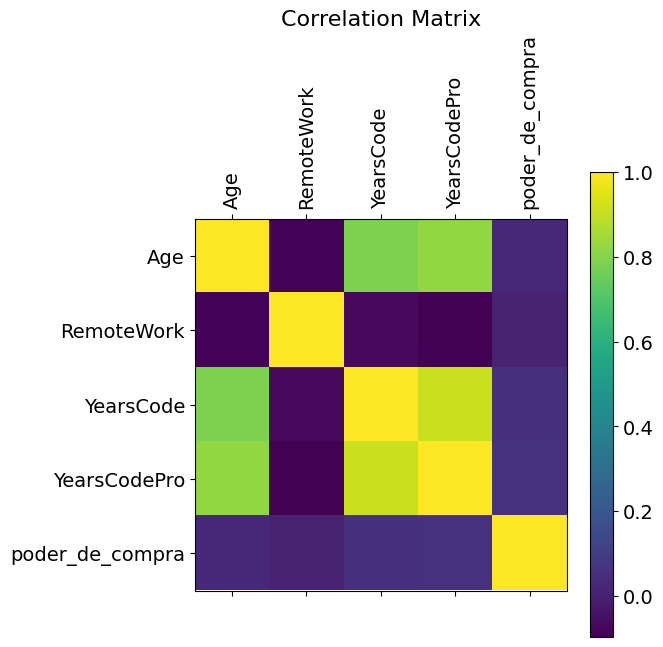

In [27]:
numericos_salario_corr = outros_salario_df.corr()

f = plt.figure(figsize=(6, 6))
plt.matshow(numericos_salario_corr, fignum=f.number)
plt.xticks(range(numericos_salario_corr.shape[1]), numericos_salario_corr.columns, fontsize=14, rotation=90)
plt.yticks(range(numericos_salario_corr.shape[1]), numericos_salario_corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Distribuições

In [28]:
import math
def plotUniques(df, col, target_col):
    # uniques = df[col].unique()
    # f = plt.figure(figsize=(8, 6))

    # for unique in uniques:
    #     subset = df[df[col] == unique]
    #     plt.hist(subset[target_col], bins=50,label=f'{unique}', alpha=0.3, log=True)
    
    # plt.title(f'Density Curves for {target_col} by Categories in Nominal Columns')
    # plt.xlabel(target_col)
    # plt.ylabel('Density')
    # plt.legend()
    # plt.show()
    uniques = df[col].unique()
    num_uniques = len(uniques)
    
    # Determine the number of rows and columns for the grid
    num_cols = 3
    num_rows = math.ceil(num_uniques / num_cols)
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 4))
    axs = axs.flatten()  # Flatten the array to make indexing easier
    
    for i, unique in enumerate(uniques):
        subset = df[df[col] == unique]
        axs[i].hist(subset[target_col], bins=50, label=f'{unique}', alpha=0.7, log=True)
        axs[i].set_title(f'{unique}')
        axs[i].set_xlabel(target_col)
        axs[i].set_ylabel('Density')
        axs[i].legend()

    # Hide any unused subplots
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axs[j])
    
    fig.suptitle(f'Density Curves for {target_col} by Categories in {col}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()

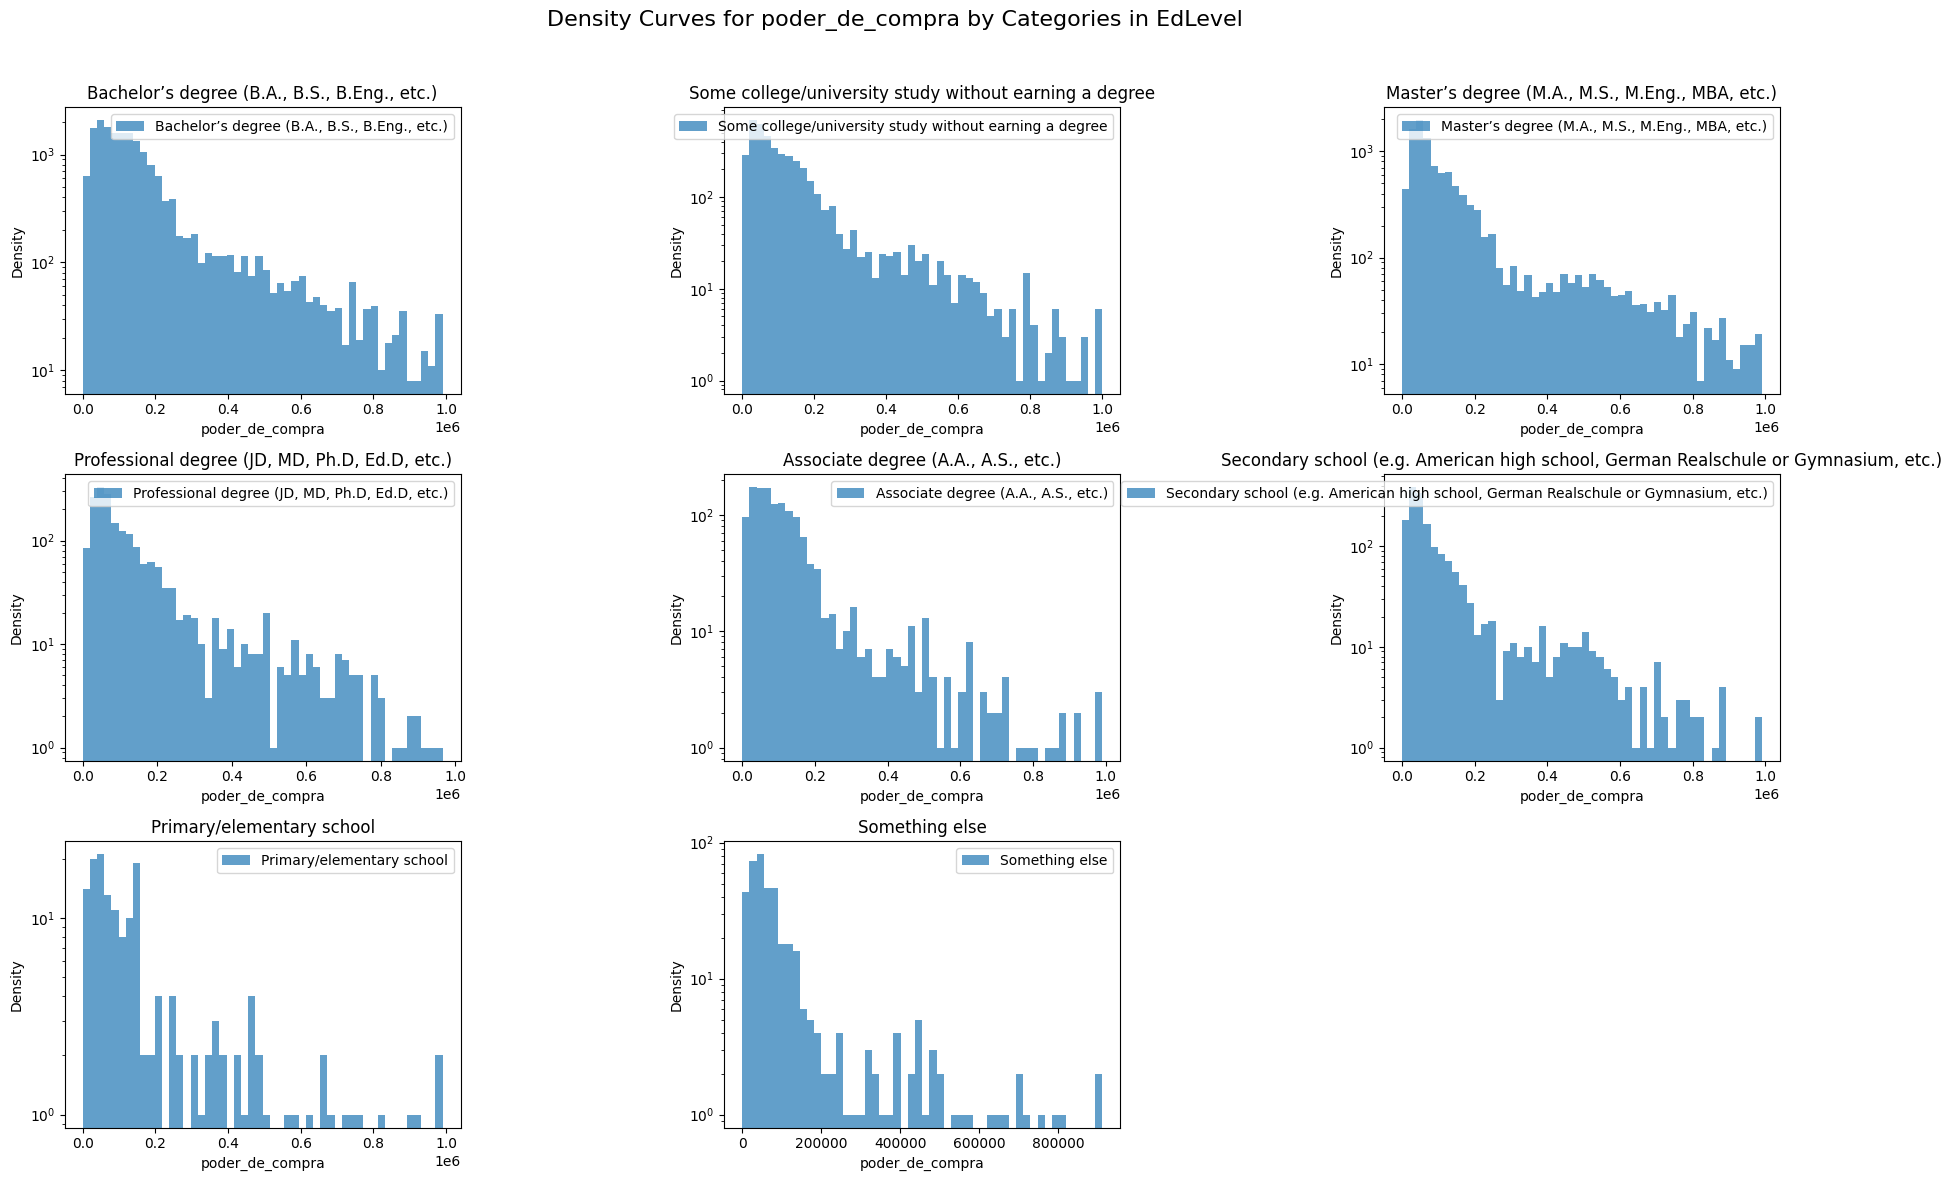

In [29]:
tmp_df = outros_salario_df
tmp_df = tmp_df[tmp_df["poder_de_compra"] < 1000000]
plotUniques(tmp_df, "EdLevel", "poder_de_compra")

## Subgroup Discovery

Vamos tentar descobrir subgrupos interessantes sobre a nossa base. Para tal, precisamos tratar um pouco a base e fazermos algumas análises.

### Filtragens para algortimos

<Axes: >

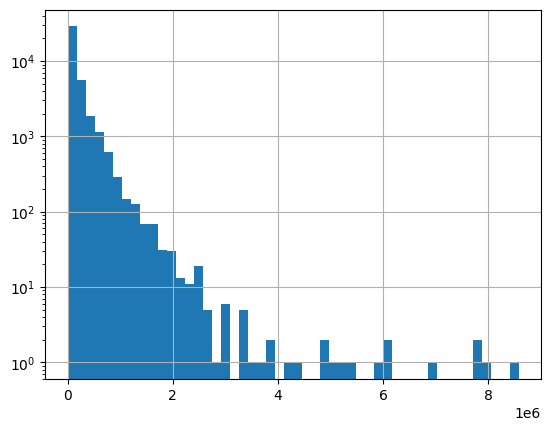

In [30]:
final_df = dev_df
final_df["poder_de_compra"].hist(bins=50, log=True)

Temos poucas pessoas com mais de 2 milhões de dolares em salário.

In [31]:
final_df[final_df["poder_de_compra"] > 2000000][["poder_de_compra", "Country", "FinalDevType"]]

,poder_de_compra,Country,FinalDevType
626,2401200.00,Russian Federation,Research-&-Development-role
706,2127703.32,Russian Federation,back-end
2140,5175220.34,Sweden,full-stack
5410,2450037.18,India,back-end
5833,2819419.05,Norway,embedded applications or devices
...,...,...,...
85853,6066000.00,India,back-end
86268,6860100.06,India,Hardware-Engineer
86587,3301836.76,Russian Federation,Engineering-manager
86829,2267800.00,Russian Federation,back-end


Aqui, portanto, filtraremos um pouco mais os outliers da calda superior da nossa base. 

(38974, 144)

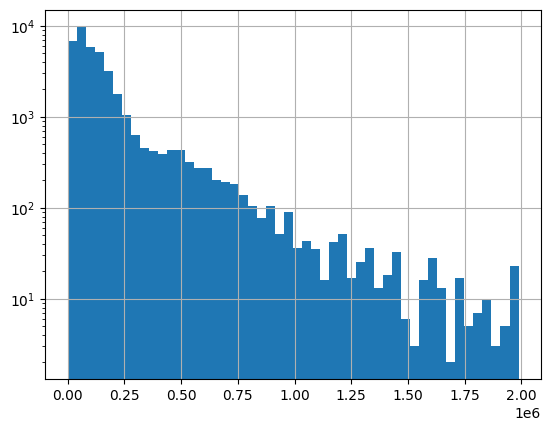

In [32]:
final_df = final_df[final_df["poder_de_compra"] < 2000000]

final_df["poder_de_compra"].hist(bins=50, log=True)
final_df.shape

<Axes: >

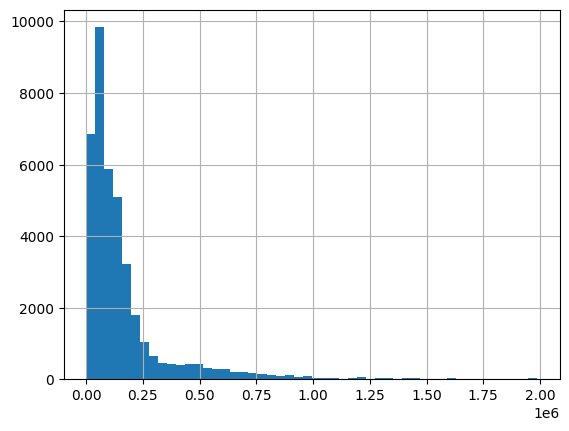

In [33]:
final_df["poder_de_compra"].hist(bins=50)

In [34]:
final_df.sample(2)

,ResponseId_left,YearsCode_left,YearsCodePro_left,CompTotal_left,WorkExp_left,ConvertedCompYearly_left,stacks_APL,stacks_Ada,stacks_Apex,stacks_Assembly,stacks_Bash/Shell (all shells),stacks_C,stacks_C#,stacks_C++,stacks_Clojure,stacks_Cobol,stacks_Crystal,stacks_Dart,stacks_Delphi,stacks_Elixir,stacks_Erlang,stacks_F#,stacks_Flow,stacks_Fortran,stacks_GDScript,stacks_Go,stacks_Groovy,stacks_HTML/CSS,stacks_Haskell,stacks_Java,stacks_JavaScript,stacks_Julia,stacks_Kotlin,stacks_Lisp,stacks_Lua,stacks_MATLAB,stacks_Nim,stacks_OCaml,stacks_Objective-C,stacks_PHP,stacks_Perl,stacks_PowerShell,stacks_Prolog,stacks_Python,stacks_R,stacks_Raku,stacks_Ruby,stacks_Rust,stacks_SAS,stacks_SQL,stacks_Scala,stacks_Solidity,stacks_Swift,stacks_TypeScript,stacks_VBA,stacks_Visual Basic (.Net),stacks_Zig,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly,poder_de_compra,stacks,FinalDevType
55626,222508,80,72,3120000.0,80.0,448608.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,55627,I agree,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Hackathons (v...,Formal documentation provided by the owner of ...,Coursera,20,18,"Developer, back-end",20 to 99 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,Denmark,DKK\tDanish krone,780000.0,Clojure;JavaScript;Ruby;SQL,Clojure;JavaScript;Ruby;SQL,Elasticsearch;PostgreSQL,Datomic;Elasticsearch;PostgreSQL,Amazon Web Services (AWS),Amazon Web Services (AWS),Vue.js,Vue.js,NaN,NaN,Docker;Make;npm;Webpack,Docker;Make;npm;Webpack,Emacs,Emacs,Ubuntu;Windows,Ubuntu,Shortcut;Wikis,Shortcut;Wikis,Google Meet;Slack;Zoom,Google Meet;Zoom,NaN,NaN,NaN,NaN,Stack Overflow;Stack Exchange,A few times per month or weekly,Yes,I have never participated in Q&A on Stack Over...,"No, not really",NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,20.0,Strongly agree,Disagree,Agree,Strongly agree,Agree,Neither agree nor disagree,Disagree,Strongly agree,1-2 times a week,6-10 times a week,Never,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,"Information Services, IT, Software Development...",Appropriate in length,Easy,112152.0,685248.72,"[Clojure, JavaScript, Ruby, SQL]",back-end
62236,62237,5,3,240000.0,3.0,240000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,62237,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,I don’t code outside of work,"Bachelo

Aqui iremos fazer alguns tratamentos na base para que ela seja utilizada como entrada para os demais metodos de mineração de subgrupos no Cortana. Iremos dropar todas colunas que não serao utilizadas, removeremos dados nulos e removeremos espaços (cortana nao consegue lidar bem com colunas que tenham espaços).

In [35]:
SPACE_COLS = ["Age", "Employment", "RemoteWork", "EdLevel", "OrgSize", "Country"]

def removeSpace(str):
    return str.replace(' ', '-').replace(',', '')

def handleSpaceCols(row, col):
    if row[col] is None:
        return 0
    return removeSpace(row[col])

subgroup_df = final_df.drop(columns=["YearsCode_left", "YearsCodePro_left", "ResponseId_left", "CompTotal_left", "WorkExp_left", "ConvertedCompYearly_left", "ResponseId", "Q120", "MainBranch",
                                     "CodingActivities", "LearnCode", "LearnCodeOnline", "LearnCodeCoursesCert", "DevType", "PurchaseInfluence",
                                     "TechList", "BuyNewTool", "Currency", "CompTotal", "LanguageHaveWorkedWith", "LanguageWantToWorkWith", "DatabaseHaveWorkedWith",
                                     "DatabaseWantToWorkWith", "PlatformHaveWorkedWith", "PlatformWantToWorkWith", "WebframeHaveWorkedWith", "WebframeWantToWorkWith",
                                     "MiscTechHaveWorkedWith", "MiscTechWantToWorkWith", "ToolsTechHaveWorkedWith", "ToolsTechWantToWorkWith", "NEWCollabToolsHaveWorkedWith",
                                     "NEWCollabToolsWantToWorkWith", "OpSysPersonal use", "OpSysProfessional use", "OfficeStackAsyncHaveWorkedWith",
                                     "OfficeStackAsyncWantToWorkWith", "AISearchHaveWorkedWith", "AISearchWantToWorkWith", "AIDevHaveWorkedWith", 
                                     "AIDevWantToWorkWith", "NEWSOSites", "SOVisitFreq", "SOAccount", "SOPartFreq", "SOComm", "SOAI", "AISelect", 
                                     "AISent", "AIAcc", "AIBen", "AIToolInterested in Using", "AIToolCurrently Using", 
                                     "AIToolNot interested in Using", "AINextVery different", "AINextNeither different nor similar", 
                                     "AINextSomewhat similar", "AINextVery similar", "AINextSomewhat different", "TBranch", "ICorPM", "WorkExp", 
                                     "Knowledge_1", "Knowledge_2", "Knowledge_3", "Knowledge_4", "Knowledge_5", "Knowledge_6", "Knowledge_7", 
                                     "Knowledge_8", "Frequency_1", "Frequency_2", "Frequency_3", "TimeSearching", "TimeAnswering", "ProfessionalTech",
                                     "Industry", "SurveyLength", "SurveyEase", "ConvertedCompYearly", "OfficeStackSyncHaveWorkedWith",
                                     "OfficeStackSyncWantToWorkWith", "stacks"])
subgroup_df = subgroup_df.dropna(subset=["OrgSize"])

for col in SPACE_COLS:
    subgroup_df[col] = subgroup_df.apply(lambda row: handleSpaceCols(row, col), axis=1)
subgroup_df.sample(1)

,stacks_APL,stacks_Ada,stacks_Apex,stacks_Assembly,stacks_Bash/Shell (all shells),stacks_C,stacks_C#,stacks_C++,stacks_Clojure,stacks_Cobol,stacks_Crystal,stacks_Dart,stacks_Delphi,stacks_Elixir,stacks_Erlang,stacks_F#,stacks_Flow,stacks_Fortran,stacks_GDScript,stacks_Go,stacks_Groovy,stacks_HTML/CSS,stacks_Haskell,stacks_Java,stacks_JavaScript,stacks_Julia,stacks_Kotlin,stacks_Lisp,stacks_Lua,stacks_MATLAB,stacks_Nim,stacks_OCaml,stacks_Objective-C,stacks_PHP,stacks_Perl,stacks_PowerShell,stacks_Prolog,stacks_Python,stacks_R,stacks_Raku,stacks_Ruby,stacks_Rust,stacks_SAS,stacks_SQL,stacks_Scala,stacks_Solidity,stacks_Swift,stacks_TypeScript,stacks_VBA,stacks_Visual Basic (.Net),stacks_Zig,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,poder_de_compra,FinalDevType
759,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,45-54-years-old,Employed-full-time,Hybrid-(some-remote-some-in-person),Master’s-degree-(M.A.-M.S.-M.Eng.-MBA-etc.),38,27,20-to-99-employees,Norway,684716.69,QA or test


### Slices DB into quartiles

Obteremos os quartís da base para fazermos uma análise mais apurada em função aos quartís da extremidade

In [36]:
[quartile_1, quartile_2, quartile_3, quartile_4] = getQuartiles(subgroup_df, 'poder_de_compra')

Aqui iremos apenas z-normalizar os dados que desejamos salvar como entrada para o cortana. Caso deseje mudar o quartil a ser analisado, apenas mude a 3ª linha deste bloco.

Caso o quartil a ser utilizado seja o 4º, recomendamos usar o log10 comentado, pois a calda pode ser muito longa e pode afetar a visualização dos dados.

/home/junio/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5429.000000
mean       -0.275622
std         0.477941
min        -2.889382
25%        -0.431409
50%        -0.131145
75%         0.044713
max         0.170178
Name: poder_de_compra, dtype: float64

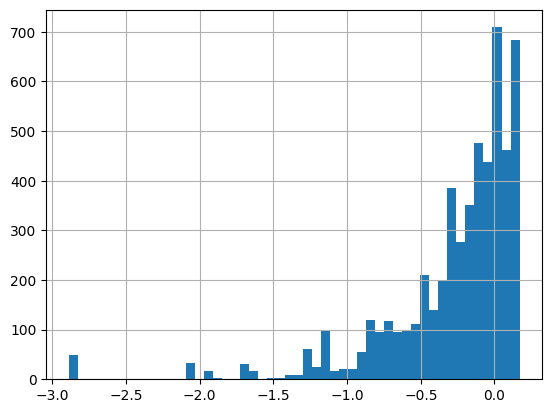

In [37]:
scaler = StandardScaler()

to_save = quartile_1.drop(columns=["quartile"])
to_save["poder_de_compra"] = scaler.fit_transform(to_save[["poder_de_compra"]])
to_save["poder_de_compra"] = np.log10(to_save["poder_de_compra"])
to_save["poder_de_compra"].hist(bins=50)
to_save["poder_de_compra"].describe()

In [38]:
SUBGROUP_OUTPUT_PATH = "./data/in/in_sd_total_7_log_z-norm.csv"

to_save.to_csv(SUBGROUP_OUTPUT_PATH, index=False)

### Resultados

Todos resultados obtidos não utilizaram das colunas de stacks. Refinement depth sempre foi 7 e max subrgroups foi 5.

#### 1- 4º quartil `AND` sem z-normalização mas com log10 aplicado `AND` poder de compra < 350000

A seguir está apresentado as métricas usadas no cortana para obter os resultados a seguir. É importante ressaltar que para a base abaixod e 350.000 dolares nós fizemos 2 testes:

1- A base com as colunas de `YearsCode` e `YearsCodePro` ativadas (resultado pode ser visto em `./data/out/SD/1/acima_4_quantile_suecia_outlie<350000.csv`).

2- Essas mesmas colunas desativadas (resultado pode ser visto em `./data/out/SD/1/acima_4_quantile_suecia_india_outlie<350000.csv`).

Iremos mostrar os resultados de `(2)` pois o resultado de 1 apenas reforçava os subgrupos relacionados à Suécia, enquanto `(1)` possuía subgrupos de maior diversidade, como veremos abaixo.

![a](data/imgs/sd-1.png){height=300px}

In [39]:
to_save[to_save["poder_de_compra"] < 350000]["poder_de_compra"].describe()

count    5429.000000
mean       -0.275622
std         0.477941
min        -2.889382
25%        -0.431409
50%        -0.131145
75%         0.044713
max         0.170178
Name: poder_de_compra, dtype: float64

Resultados:

In [40]:
result_1 = pd.read_csv("./data/out/SD/1/acima_4_quantile_suecia_india_outlie<350000.csv", "\t")
result_1

/tmp/ipykernel_1198/3455787646.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  result_1 = pd.read_csv("./data/out/SD/1/acima_4_quantile_suecia_india_outlie<350000.csv", "\t")


,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions
0,1,1,489,0.022808,5.362841,0.115212,NaN,Country = 'India'
1,2,2,432,0.020876,5.366105,0.114653,NaN,Country = 'India' AND Employment = 'Employed-f...
2,3,1,97,0.019173,5.474681,0.064695,NaN,Country = 'Sweden'
3,4,2,379,0.018062,5.360752,0.117345,NaN,Country = 'India' AND EdLevel = 'Bachelor’s-de...
4,5,2,83,0.017696,5.482628,0.051838,NaN,Country = 'Sweden' AND Employment = 'Employed-...


<figure>
<img src="data/imgs/sd-1-suecia.png" height="250px"/>
<figcaption>Resultado linha 3</figcaption>
</figure>

<!-- ![suecia](){} -->

Caso deseje ver mais curvas de distribuição dessa população, lembre-se de que a população é somente abaixo dos 350mil dolares.

#### 2- 4º quartil `AND` sem z-normalização mas com log10 aplicado `AND` poder de compra < 2000000

A seguir está apresentado as métricas usadas no cortana para obter os resultados a seguir. É importante ressaltar que para a base abaixo de 2.000.000 dolares nós fizemos 1 teste:

1- A base com as colunas de `YearsCode` e `YearsCodePro` desativadas (resultado pode ser visto em `./data/out/SD/2/acima_4_quantile_russia_noruega_2milhoes.csv`).

![a](data/imgs/sd-2.png){height=300px}

In [41]:
to_save[to_save["poder_de_compra"] < 2000000]["poder_de_compra"].describe()

count    5429.000000
mean       -0.275622
std         0.477941
min        -2.889382
25%        -0.431409
50%        -0.131145
75%         0.044713
max         0.170178
Name: poder_de_compra, dtype: float64

In [42]:
result_2 = pd.read_csv("./data/out/SD/2/acima_4_quantile_russia_noruega_2milhoes.csv", "\t")
result_2

/tmp/ipykernel_1198/3067680913.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  result_2 = pd.read_csv("./data/out/SD/2/acima_4_quantile_russia_noruega_2milhoes.csv", "\t")


,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions
0,1,1,467,25.199373,5.835924,0.130176,NaN,Country = 'Norway'
1,2,1,306,25.159840,5.903466,0.280342,NaN,Country = 'Russian-Federation'
2,3,1,1318,24.099457,5.711295,0.258531,NaN,Country = 'India'
3,4,2,252,23.664824,5.916481,0.264230,NaN,Country = 'Russian-Federation' AND Employment ...
4,5,2,416,22.918104,5.825394,0.117201,NaN,Country = 'Norway' AND Employment = 'Employed-...


<figure>
<img src="data/imgs/sd-2-noruega.png" height="250px"/>
<figcaption>Resultado linha 1</figcaption>
</figure>

<figure>
<img src="data/imgs/sd-2-russia.png" height="250px"/>
<figcaption>Resultado linha 2</figcaption>
</figure>

#### 3- 4º quartil `AND` sem z-normalização mas com log10 aplicado `AND` poder de compra < 2000000 `AND` Country, YearsCode e YearsCodePro desativados

A seguir está apresentado as métricas usadas no cortana para obter os resultados a seguir. É importante ressaltar que para a base abaixo de 2.000.000 dolares nós fizemos 1 teste:

1- A base com as colunas de `YearsCode`, `YearsCodePro` e `Country` (por ser uma coluna de alta dominação sobre as outras, decidimos fazer alguns testes sem levar em consideração esta coluna para entendermos quais padrões o algoritmo conseguirir captar) desativadas (resultado pode ser visto em `./data/out/SD/3/acima_4_quartile_master_hybrid_2000000.csv`).

![a](data/imgs/sd-3.png){height=300px}

In [43]:
to_save[to_save["poder_de_compra"] < 2000000]["poder_de_compra"].describe()

count    5429.000000
mean       -0.275622
std         0.477941
min        -2.889382
25%        -0.431409
50%        -0.131145
75%         0.044713
max         0.170178
Name: poder_de_compra, dtype: float64

In [44]:
result_3 = pd.read_csv("./data/out/SD/3/acima_4_quartile_master_hybrid_2000000.csv", "\t")
result_3

/tmp/ipykernel_1198/480317273.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  result_3 = pd.read_csv("./data/out/SD/3/acima_4_quartile_master_hybrid_2000000.csv", "\t")


,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions
0,1,2,1137,12.620914,5.639455,0.254283,NaN,RemoteWork = 'Hybrid-(some-remote-some-in-pers...
1,2,2,1137,12.620914,5.639455,0.254283,NaN,EdLevel = 'Master’s-degree-(M.A.-M.S.-M.Eng.-M...
2,3,1,3899,12.447682,5.596046,0.241376,NaN,RemoteWork = 'Hybrid-(some-remote-some-in-pers...
3,4,2,1167,12.099188,5.634464,0.251312,NaN,Age = '25-34-years-old' AND EdLevel = 'Master’...
4,5,2,1167,12.099188,5.634464,0.251312,NaN,EdLevel = 'Master’s-degree-(M.A.-M.S.-M.Eng.-M...


<figure>
<img src="data/imgs/sd-3-masters.png" height="250px"/>
<figcaption>Resultado linha 2</figcaption>
</figure>

<figure>
<img src="data/imgs/sd-3-masters-jovem.png" height="250px"/>
<figcaption>Resultado linha 5</figcaption>
</figure>

#### 4- 4º quartil `AND` sem z-normalização mas com log10 aplicado `AND` poder de compra < 2000000 `AND` YearsCode e YearsCodePro desativados

A seguir está apresentado as métricas usadas no cortana para obter os resultados a seguir. É importante ressaltar que para a base abaixo de 2.000.000 dolares nós fizemos 1 teste:

1- A base com as colunas de `YearsCode`, `YearsCodePro` desativadas (resultado pode ser visto em `./data/out/SD/4/abaixo_4_quantile_eua_2000000.csv`).

![a](data/imgs/sd-4.png){height=300px}

In [45]:
to_save[to_save["poder_de_compra"] < 2000000]["poder_de_compra"].describe()

count    5429.000000
mean       -0.275622
std         0.477941
min        -2.889382
25%        -0.431409
50%        -0.131145
75%         0.044713
max         0.170178
Name: poder_de_compra, dtype: float64

In [46]:
result_4 = pd.read_csv("./data/out/SD/4/abaixo_4_quantile_eua_2000000.csv", "\t")
result_4

/tmp/ipykernel_1198/472844225.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  result_4 = pd.read_csv("./data/out/SD/4/abaixo_4_quantile_eua_2000000.csv", "\t")


,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions
0,1,1,3856,0.113408,5.388436,0.139447,NaN,Country = 'United-States-of-America'
1,2,2,3478,0.102590,5.387294,0.140230,NaN,Country = 'United-States-of-America' AND Emplo...
2,3,2,2357,0.082986,5.374094,0.127122,NaN,Country = 'United-States-of-America' AND Remot...
3,4,3,2051,0.073071,5.372116,0.128229,NaN,Country = 'United-States-of-America' AND Emplo...
4,5,3,2051,0.073071,5.372116,0.128229,NaN,Country = 'United-States-of-America' AND Remot...


Note como a média dos subgrupos estão abaixo da média populacional apresentada acima.

<figure>
<img src="data/imgs/sd-4-eua.png" height="250px"/>
<figcaption>Resultado linha 1</figcaption>
</figure>

#### 5- 4º quartil `AND` com z-normalização `AND` poder de compra < 2000000 `AND` YearsCode e YearsCodePro desativados

A seguir está apresentado as métricas usadas no cortana para obter os resultados a seguir. É importante ressaltar que para a base abaixo de 2.000.000 dolares nós fizemos 1 teste:

1- A base com as colunas de `YearsCode`, `YearsCodePro` desativadas (resultado pode ser visto em `./data/out/SD/5/abaixo_5_quantile_remoto_2milhoes.csv`).

![a](data/imgs/sd-5.png){height=300px}

In [47]:
to_save[to_save["poder_de_compra"] < 2000000]["poder_de_compra"].describe()

count    5429.000000
mean       -0.275622
std         0.477941
min        -2.889382
25%        -0.431409
50%        -0.131145
75%         0.044713
max         0.170178
Name: poder_de_compra, dtype: float64

In [48]:
result_5 = pd.read_csv("./data/out/SD/5/abaixo_5_quantile_remoto_2milhoes.csv", "\t")
result_5

/tmp/ipykernel_1198/4260977345.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  result_5 = pd.read_csv("./data/out/SD/5/abaixo_5_quantile_remoto_2milhoes.csv", "\t")


,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions
0,1,1,4480,0.022522,-0.157542,1.012564,NaN,RemoteWork = 'Remote'
1,2,2,3469,0.018439,-0.187554,0.973169,NaN,RemoteWork = 'Remote' AND Employment = 'Employ...
2,3,2,2417,0.017198,-0.233504,0.948633,NaN,RemoteWork = 'Remote' AND EdLevel = 'Bachelor’...
3,4,3,1968,0.015722,-0.262065,0.907054,NaN,RemoteWork = 'Remote' AND Employment = 'Employ...
4,5,3,1968,0.015722,-0.262065,0.907054,NaN,RemoteWork = 'Remote' AND EdLevel = 'Bachelor’...


Note como a média dos subgrupos estão abaixo da média populacional apresentada acima.

<figure>
<img src="data/imgs/sd-5-remote.png" height="250px"/>
<figcaption>Resultado linha 1</figcaption>
</figure>

<figure>
<img src="data/imgs/sd-5-remote-bachelor.png" height="250px"/>
<figcaption>Resultado linha 3</figcaption>
</figure>

#### 6- 1º quartil `AND` com z-normalização `AND` YearsCode e YearsCodePro desativados

A seguir está apresentado as métricas usadas no cortana para obter os resultados a seguir. É importante ressaltar que para a base abaixo de 2.000.000 dolares nós fizemos 1 teste:

1- A base com as colunas de `YearsCode`, `YearsCodePro` desativadas (resultado pode ser visto em `./data/out/SD/6/abaixo_acima_1_quantile_alemanha_italia.csv`).

![a](data/imgs/sd-6.png){height=300px}

In [49]:
to_save["poder_de_compra"].describe()

count    5429.000000
mean       -0.275622
std         0.477941
min        -2.889382
25%        -0.431409
50%        -0.131145
75%         0.044713
max         0.170178
Name: poder_de_compra, dtype: float64

In [50]:
result_6 = pd.read_csv("./data/out/SD/6/abaixo_acima_1_quantile_alemanha_italia.csv", "\t")
result_6

/tmp/ipykernel_1198/2947810426.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  result_6 = pd.read_csv("./data/out/SD/6/abaixo_acima_1_quantile_alemanha_italia.csv", "\t")


,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions
0,1,2,1441,0.038532,0.573701,0.804433,NaN,Country = 'Germany' AND Employment = 'Employed...
1,2,1,1735,0.037025,0.510395,0.865310,NaN,Country = 'Germany'
2,3,1,889,0.027594,-0.488827,0.794451,NaN,Country = 'Italy'
3,4,2,756,0.027056,-0.509148,0.754766,NaN,Country = 'Italy' AND Employment = 'Employed-f...
4,5,3,865,0.026219,0.612604,0.741774,NaN,Country = 'Germany' AND Age = '25-34-years-old...


Note como a média dos subgrupos estão abaixo da média populacional apresentada acima.

<figure>
<img src="data/imgs/sd-6-alemanha-fulltime.png" height="250px"/>
<figcaption>Resultado linha 1</figcaption>
</figure>

<figure>
<img src="data/imgs/sd-6-italia-fulltime.png" height="250px"/>
<figcaption>Resultado linha 4</figcaption>
</figure>

## Frequente Patterns

Vamos tentar minerar alguns padrões frequentes da nossa base.

###  Preparando

In [51]:
fp_df = dev_df
fp_df.shape

(39054, 144)

<Axes: >

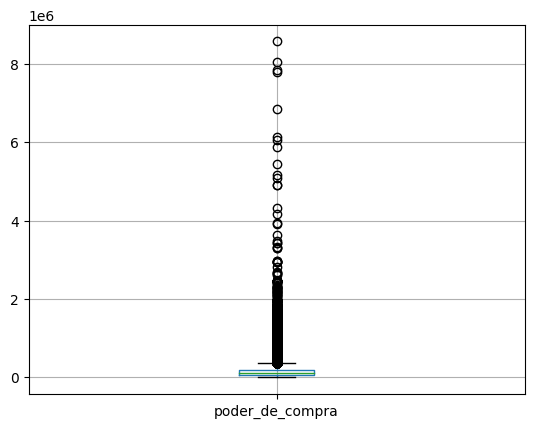

In [52]:
fp_df.boxplot(column="poder_de_compra")

<Axes: >

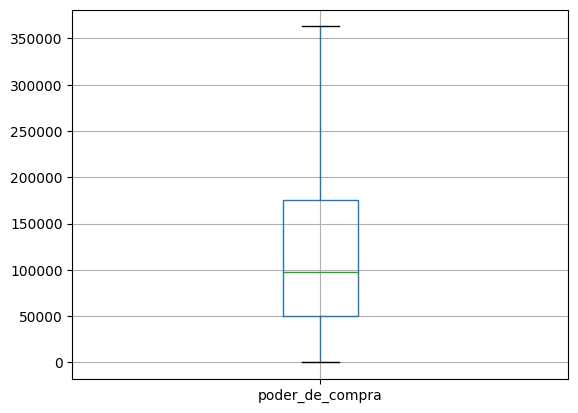

In [53]:
fp_df.boxplot(column="poder_de_compra", showfliers=False)

Aqui iremos remoever colunas não utilizadas, remover dados nulos e tirar alguns outliers.

In [54]:
SPACE_COLS = ["Age", "Employment", "RemoteWork", "EdLevel", "OrgSize", "Country"]

def removeSpace(str):
    return str.replace(' ', '-').replace(',', '')

def handleSpaceCols(row, col):
    if row[col] is None:
        return 0
    return removeSpace(row[col])

fp_df = fp_df.drop(columns=["ResponseId_left", "CompTotal_left", "WorkExp_left", "ConvertedCompYearly_left", "ResponseId", "Q120", "MainBranch",
                            "CodingActivities", "LearnCode", "LearnCodeOnline", "LearnCodeCoursesCert", "DevType", "PurchaseInfluence",
                            "TechList", "BuyNewTool", "Currency", "CompTotal", "LanguageHaveWorkedWith", "LanguageWantToWorkWith", "DatabaseHaveWorkedWith",
                            "DatabaseWantToWorkWith", "PlatformHaveWorkedWith", "PlatformWantToWorkWith", "WebframeHaveWorkedWith", "WebframeWantToWorkWith",
                            "MiscTechHaveWorkedWith", "MiscTechWantToWorkWith", "ToolsTechHaveWorkedWith", "ToolsTechWantToWorkWith", "NEWCollabToolsHaveWorkedWith",
                            "NEWCollabToolsWantToWorkWith", "OpSysPersonal use", "OpSysProfessional use", "OfficeStackAsyncHaveWorkedWith",
                            "OfficeStackAsyncWantToWorkWith", "AISearchHaveWorkedWith", "AISearchWantToWorkWith", "AIDevHaveWorkedWith", 
                            "AIDevWantToWorkWith", "NEWSOSites", "SOVisitFreq", "SOAccount", "SOPartFreq", "SOComm", "SOAI", "AISelect", 
                            "AISent", "AIAcc", "AIBen", "AIToolInterested in Using", "AIToolCurrently Using", 
                            "AIToolNot interested in Using", "AINextVery different", "AINextNeither different nor similar", 
                            "AINextSomewhat similar", "AINextVery similar", "AINextSomewhat different", "TBranch", "ICorPM", "WorkExp", 
                            "Knowledge_1", "Knowledge_2", "Knowledge_3", "Knowledge_4", "Knowledge_5", "Knowledge_6", "Knowledge_7", 
                            "Knowledge_8", "Frequency_1", "Frequency_2", "Frequency_3", "TimeSearching", "TimeAnswering", "ProfessionalTech",
                            "Industry", "SurveyLength", "SurveyEase", "ConvertedCompYearly", "OfficeStackSyncHaveWorkedWith",
                            "OfficeStackSyncWantToWorkWith",
                            'stacks_APL', 'stacks_Ada', 'stacks_Apex', 'stacks_Assembly', 'stacks_Bash/Shell (all shells)', 
                            'stacks_C', 'stacks_C#', 'stacks_C++', 'stacks_Clojure', 'stacks_Cobol', 
                            'stacks_Crystal', 'stacks_Dart', 'stacks_Delphi', 'stacks_Elixir', 'stacks_Erlang', 
                            'stacks_F#', 'stacks_Flow', 'stacks_Fortran', 'stacks_GDScript', 'stacks_Go', 
                            'stacks_Groovy', 'stacks_HTML/CSS', 'stacks_Haskell', 'stacks_Java', 
                            'stacks_JavaScript', 'stacks_Julia', 'stacks_Kotlin', 'stacks_Lisp', 'stacks_Lua',
                            'stacks_MATLAB', 'stacks_Nim', 'stacks_OCaml', 'stacks_Objective-C', 'stacks_PHP',
                            'stacks_Perl', 'stacks_PowerShell', 'stacks_Prolog', 'stacks_Python', 'stacks_R',
                            'stacks_Raku', 'stacks_Ruby', 'stacks_Rust', 'stacks_SAS', 'stacks_SQL',
                            'stacks_Scala', 'stacks_Solidity', 'stacks_Swift', 'stacks_TypeScript',
                            'stacks_VBA', 'stacks_Visual Basic (.Net)', 'stacks_Zig'])
fp_df = fp_df.dropna(subset=["OrgSize"])
fp_df = fp_df[fp_df["poder_de_compra"] < 2000000]

for col in SPACE_COLS:
    fp_df[col] = fp_df.apply(lambda row: handleSpaceCols(row, col), axis=1)
fp_df.sample(1)

,YearsCode_left,YearsCodePro_left,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,poder_de_compra,stacks,FinalDevType
31116,288,288,45-54-years-old,Employed-full-time;Independent-contractor-free...,Hybrid-(some-remote-some-in-person),Master’s-degree-(M.A.-M.S.-M.Eng.-MBA-etc.),36,36,10-to-19-employees,United-States-of-America,180000.0,"[Bash/Shell (all shells), C, HTML/CSS, JavaScr...",desktop or enterprise applications


In [55]:
fp_df["quartile"] = pd.qcut(fp_df['poder_de_compra'], 4, labels=False)

fp_quartile_1 = fp_df[fp_df['quartile'] == 0]
fp_quartile_2 = fp_df[fp_df['quartile'] == 1]
fp_quartile_3 = fp_df[fp_df['quartile'] == 2]
fp_quartile_4 = fp_df[fp_df['quartile'] == 3]

# FP nos quartís
# df_list = {"25":fp_quartile_1,"50":fp_quartile_2,"75": fp_quartile_3, "100": fp_quartile_4}
# FP na base toda
df_list = {"total":fp_df}

### Salvando no padrão

In [56]:
fp_df = fp_df.drop(columns=["quartile"])
fp_df.sample(1)

,YearsCode_left,YearsCodePro_left,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,poder_de_compra,stacks,FinalDevType
24907,264,216,35-44-years-old,Employed-full-time;Employed-part-time,Remote,Bachelor’s-degree-(B.A.-B.S.-B.Eng.-etc.),22,18,100-to-499-employees,Canada,97430.58,"[Apex, C#, C++, GDScript, HTML/CSS, Java, Java...",back-end


In [57]:
FP_COLUMNS = ["Age", "Employment", "RemoteWork", "EdLevel", "YearsCode", "YearsCodePro", "OrgSize", "Country", "FinalDevType"]

unique_stacks = fp_df["stacks"].explode().unique()

other_uniques = {}

for col in FP_COLUMNS:
    other_uniques[col] = fp_df[col].unique()

Cria um mapa com a lista de itens.

In [58]:
final_map = {}
size = 1

for i in range(unique_stacks.shape[0]):
    final_map[unique_stacks[i]] = size
    size += 1

for (col, uniques) in other_uniques.items():
    for i in range(uniques.shape[0]):
        final_map[str(uniques[i])] = size
        size += 1

In [65]:
OUTPUT_PATH = "./data/out/FP/sem_stack"
FILE_NAME = "in_fp"

In [66]:
import subprocess

for quartile, df in df_list.items():
    casted_file = f"{OUTPUT_PATH}/{FILE_NAME}_{quartile}.txt"
    with open(casted_file, 'w') as file:
        file.write("@CONVERTED_FROM_TEXT\n")
        # Header
        for (key, item) in final_map.items():
            file.write(f"@ITEM={item}={key},\n")
        # Sequences
        for row in df.itertuples():
            casted_items = []
            for col in FP_COLUMNS:
                idd = final_map[str(getattr(row, col))]
                casted_items.append(str(idd))
            casted_items += list(map(lambda x: str(final_map[x]), row.stacks))
            file.write(f"{' '.join(casted_items)}\n")
    
        subprocess.run(["java", "-jar", "../HighUtilityItemsetMining/spmf.jar", "run", "FPGrowth_itemsets", f"{casted_file}",  f"{OUTPUT_PATH}/output_{quartile}.txt","30%"])

Error: Unable to access jarfile ../HighUtilityItemsetMining/spmf.jar


Resultados podem ser vistos em `data/out/FP`. `usando_so_stack` foram os resultados fazendo a divisão de quartís e analisando somente as stacks. `stack_e_o_resto` usou todas as colunas que foram usadas nas análises de SD, porém com a adição das stacks. Além disso, também minerou os padrões sobre a base inteira, ao em vez de quartís. `sem_stack` segue a mesma lógica, porém sem as colunas de stack.

## Resultados

#### 1- Todas as colunas usadas no SD

In [72]:
with open('data/out/FP/stack_e_o_resto/output_total.txt', 'r') as arquivo:
    for linha in arquivo:
        print(linha.strip())

Bash/Shell (all shells), #SUP: 13943
Bash/Shell (all shells), Employed-full-time, #SUP: 11703
full-stack, #SUP: 14068
JavaScript, full-stack, #SUP: 11975
TypeScript, #SUP: 16564
TypeScript, Employed-full-time, #SUP: 13691
JavaScript, TypeScript, #SUP: 14340
JavaScript, TypeScript, Employed-full-time, #SUP: 11787
Hybrid-(some-remote-some-in-person), #SUP: 16833
Employed-full-time, Hybrid-(some-remote-some-in-person), #SUP: 14704
Remote, #SUP: 17245
Employed-full-time, Remote, #SUP: 13462
25-34-years-old, #SUP: 17564
25-34-years-old, Employed-full-time, #SUP: 15162
Python, #SUP: 17880
Python, Employed-full-time, #SUP: 15168
Bachelor’s-degree-(B.A.-B.S.-B.Eng.-etc.), #SUP: 18123
JavaScript, Bachelor’s-degree-(B.A.-B.S.-B.Eng.-etc.), #SUP: 12076
Employed-full-time, Bachelor’s-degree-(B.A.-B.S.-B.Eng.-etc.), #SUP: 15626
HTML/CSS, #SUP: 19655
HTML/CSS, SQL, #SUP: 12634
HTML/CSS, Employed-full-time, #SUP: 15924
HTML/CSS, JavaScript, #SUP: 17541
HTML/CSS, JavaScript, Employed-full-time, #SUP: 

Utilizando todos as colunas escolhidas não houveram muitos padrões diferentes do esperado, podemos ver padrões como Javascript Typescript e HTML, que são linguagens muitas vezes utilizadas em conjunto, dentre outras características e conhecimentos base de programação.

#### 2- Sem stacks - Padrões frequentes em faixas salariais

1º quartil

In [70]:
with open('data/out/FP/sem_stack/quartis/output_25.txt', 'r') as arquivo:
    for linha in arquivo:
        print(linha.strip())

Master’s-degree-(M.A.-M.S.-M.Eng.-MBA-etc.), #SUP: 3077
Remote, #SUP: 3230
Bachelor’s-degree-(B.A.-B.S.-B.Eng.-etc.), #SUP: 3404
full-stack, #SUP: 3670
Employed-full-time, full-stack, #SUP: 2962
Hybrid-(some-remote-some-in-person), #SUP: 4805
Employed-full-time, Hybrid-(some-remote-some-in-person), #SUP: 4173
25-34-years-old, #SUP: 4881
25-34-years-old, Employed-full-time, #SUP: 4204
Employed-full-time, #SUP: 7949


2º quartil

In [71]:
with open('data/out/FP/sem_stack/quartis/output_50.txt', 'r') as arquivo:
    for linha in arquivo:
        print(linha.strip())

35-44-years-old, #SUP: 2969
full-stack, #SUP: 3563
Remote, #SUP: 3953
Employed-full-time, Remote, #SUP: 3042
25-34-years-old, #SUP: 4163
25-34-years-old, Employed-full-time, #SUP: 3600
Bachelor’s-degree-(B.A.-B.S.-B.Eng.-etc.), #SUP: 4186
Employed-full-time, Bachelor’s-degree-(B.A.-B.S.-B.Eng.-etc.), #SUP: 3594
Hybrid-(some-remote-some-in-person), #SUP: 4528
Employed-full-time, Hybrid-(some-remote-some-in-person), #SUP: 3916
Employed-full-time, #SUP: 7962


3º quartil

In [ ]:
with open('data/out/FP/sem_stack/quartis/output_75.txt', 'r') as arquivo:
    for linha in arquivo:
        print(linha.strip())

4º quartil

In [ ]:
with open('data/out/FP/sem_stack/quartis/output_100.txt', 'r') as arquivo:
    for linha in arquivo:
        print(linha.strip())

A maioria dos padrões encontrados foram muito próximos uns dos outros mesmo em diferentes faixas salariais.

#### 3- Somente stacks - Padrões frequentes em faixas salariais

1º quartil

In [73]:
with open('data/out/FP/usando_so_stacks/output_25.txt', 'r') as arquivo:
    for linha in arquivo:
        print(linha.strip())

PHP, #SUP: 1582
Microsoft Azure, #SUP: 1608
Microsoft SQL Server, #SUP: 1762
MongoDB, #SUP: 1824
JavaScript, MongoDB, #SUP: 1483
SQLite, #SUP: 1911
C#, #SUP: 1954
Java, #SUP: 2122
Bash/Shell (all shells), #SUP: 2141
MySQL, #SUP: 2866
Amazon Web Services (AWS), MySQL, #SUP: 1510
SQL, MySQL, #SUP: 1901
JavaScript, SQL, MySQL, #SUP: 1563
HTML/CSS, MySQL, #SUP: 1930
HTML/CSS, JavaScript, MySQL, #SUP: 1802
JavaScript, MySQL, #SUP: 2250
TypeScript, #SUP: 3005
Amazon Web Services (AWS), TypeScript, #SUP: 1514
TypeScript, PostgreSQL, #SUP: 1549
SQL, TypeScript, #SUP: 1694
JavaScript, SQL, TypeScript, #SUP: 1536
HTML/CSS, TypeScript, #SUP: 2175
HTML/CSS, JavaScript, TypeScript, #SUP: 2039
JavaScript, TypeScript, #SUP: 2671
PostgreSQL, #SUP: 3057
Python, PostgreSQL, #SUP: 1649
Amazon Web Services (AWS), PostgreSQL, #SUP: 1722
HTML/CSS, PostgreSQL, #SUP: 1787
HTML/CSS, JavaScript, PostgreSQL, #SUP: 1642
SQL, PostgreSQL, #SUP: 1899
JavaScript, SQL, PostgreSQL, #SUP: 1498
JavaScript, PostgreSQL, #S

2º quartil

In [74]:
with open('data/out/FP/usando_so_stacks/output_50.txt', 'r') as arquivo:
    for linha in arquivo:
        print(linha.strip())

.NET (5+) , #SUP: 1758
C#, .NET (5+) , #SUP: 1674
Java, #SUP: 1907
SQLite, #SUP: 1919
Microsoft Azure, #SUP: 1989
Microsoft SQL Server, #SUP: 2062
SQL, Microsoft SQL Server, #SUP: 1613
C#, #SUP: 2302
JavaScript, C#, #SUP: 1593
MySQL, #SUP: 2397
SQL, MySQL, #SUP: 1660
HTML/CSS, MySQL, #SUP: 1665
HTML/CSS, JavaScript, MySQL, #SUP: 1520
JavaScript, MySQL, #SUP: 1887
Bash/Shell (all shells), #SUP: 2756
Bash/Shell (all shells), SQL, #SUP: 1633
HTML/CSS, Bash/Shell (all shells), #SUP: 1666
Python, Bash/Shell (all shells), #SUP: 1676
JavaScript, Bash/Shell (all shells), #SUP: 1857
Amazon Web Services (AWS), #SUP: 3088
Python, Amazon Web Services (AWS), #SUP: 1598
Amazon Web Services (AWS), TypeScript, #SUP: 1608
Amazon Web Services (AWS), PostgreSQL, #SUP: 1692
Amazon Web Services (AWS), SQL, #SUP: 1766
HTML/CSS, Amazon Web Services (AWS), #SUP: 1819
HTML/CSS, JavaScript, Amazon Web Services (AWS), #SUP: 1659
JavaScript, Amazon Web Services (AWS), #SUP: 2234
PostgreSQL, #SUP: 3089
TypeScript,

3º quartil

In [76]:
with open('data/out/FP/usando_so_stacks/output_75.txt', 'r') as arquivo:
    for linha in arquivo:
        print(linha.strip())

Redis, #SUP: 1531
.NET (5+) , #SUP: 1776
C#, .NET (5+) , #SUP: 1697
SQLite, #SUP: 1825
Java, #SUP: 1833
Microsoft Azure, #SUP: 2061
Microsoft SQL Server, #SUP: 2090
Microsoft SQL Server, C#, #SUP: 1529
SQL, Microsoft SQL Server, #SUP: 1690
MySQL, #SUP: 2115
SQL, MySQL, #SUP: 1487
JavaScript, MySQL, #SUP: 1616
C#, #SUP: 2352
SQL, C#, #SUP: 1602
JavaScript, C#, #SUP: 1652
Bash/Shell (all shells), #SUP: 2878
Bash/Shell (all shells), PostgreSQL, #SUP: 1536
HTML/CSS, Bash/Shell (all shells), #SUP: 1605
Amazon Web Services (AWS), Bash/Shell (all shells), #SUP: 1647
Bash/Shell (all shells), SQL, #SUP: 1694
Python, Bash/Shell (all shells), #SUP: 1750
JavaScript, Bash/Shell (all shells), #SUP: 1908
TypeScript, #SUP: 3181
TypeScript, PostgreSQL, #SUP: 1659
Amazon Web Services (AWS), TypeScript, #SUP: 1856
JavaScript, Amazon Web Services (AWS), TypeScript, #SUP: 1643
SQL, TypeScript, #SUP: 1866
JavaScript, SQL, TypeScript, #SUP: 1686
HTML/CSS, TypeScript, #SUP: 2215
HTML/CSS, JavaScript, TypeScri

4º quartil

In [75]:
with open('data/out/FP/usando_so_stacks/output_100.txt', 'r') as arquivo:
    for linha in arquivo:
        print(linha.strip())

Microsoft SQL Server, #SUP: 1528
Go, #SUP: 1670
Microsoft Azure, #SUP: 1754
SQLite, #SUP: 1779
Google Cloud, #SUP: 1805
C#, #SUP: 1829
Redis, #SUP: 1912
Amazon Web Services (AWS), Redis, #SUP: 1510
MySQL, #SUP: 1953
Amazon Web Services (AWS), MySQL, #SUP: 1455
JavaScript, MySQL, #SUP: 1469
Java, #SUP: 2054
Bash/Shell (all shells), #SUP: 3222
Bash/Shell (all shells), TypeScript, #SUP: 1497
HTML/CSS, Bash/Shell (all shells), #SUP: 1643
HTML/CSS, JavaScript, Bash/Shell (all shells), #SUP: 1466
Bash/Shell (all shells), PostgreSQL, #SUP: 1780
Bash/Shell (all shells), SQL, #SUP: 1870
JavaScript, Bash/Shell (all shells), #SUP: 2102
JavaScript, Amazon Web Services (AWS), Bash/Shell (all shells), #SUP: 1541
Python, Bash/Shell (all shells), #SUP: 2119
Python, Amazon Web Services (AWS), Bash/Shell (all shells), #SUP: 1514
Amazon Web Services (AWS), Bash/Shell (all shells), #SUP: 2230
TypeScript, #SUP: 3281
Python, TypeScript, #SUP: 1602
TypeScript, PostgreSQL, #SUP: 1833
JavaScript, TypeScript, P

Algumas descobertas interessantes a partir da mineração de padrões frequentes incluem:

- Redis: Este banco de dados é encontrado apenas nos dois últimos quartis de faixas salariais, sugerindo que a necessidade de otimizar o desempenho de serviços com cache é mais frequentemente associada a posições de maior senioridade.

- Google Cloud: Observa-se que o uso de Google Cloud é exclusivo para o quartil superior, o que pode indicar que engenheiros de dados ou profissionais de DevOps que utilizam essa plataforma são geralmente mais bem remunerados.

- Javascript/HTML/CSS: Essas tecnologias aparecem em todas as faixas salariais, destacando a popularidade do desenvolvimento web. Isso reflete a alta demanda por profissionais nessa área, já que grande parte das oportunidades de emprego está relacionada ao desenvolvimento web. Também é notável que o JavaScript é utilizado tanto em stacks de front-end (com HTML e CSS) quanto em stacks de back-end (em combinação com bancos de dados, como MySQL).

- Go: Esta linguagem de programação é observada apenas no quartil superior, o que faz sentido, dado o crescente interesse em Go para sistemas de alta performance e escalabilidade.

- Azure e AWS: Essas plataformas de nuvem aparecem em todos os níveis salariais em combinações frequentes, ao contrário do Google Cloud, que foi encontrado apenas isoladamente.